# 學習目標: 了解PCA基本原理，並知道如何使用PCA做降維。

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

## 建立&畫出練習用的data

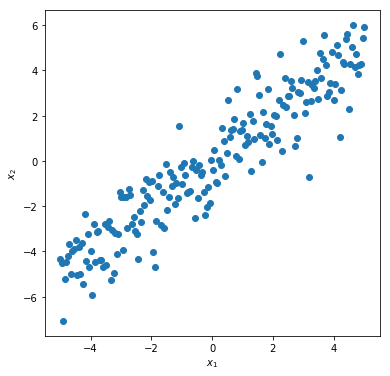

In [2]:
# 建立toy data
x1 = np.linspace(-5,5,200)
noise = np.random.normal(0,1.,len(x1))
x2 = x1 + noise

# 畫出toy data
plt.figure(figsize=(6,6))
plt.scatter(x1,x2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

寫一個函數來算data的variance:

In [3]:
variance = lambda x:np.sum( (x-x.mean() )**2 ) / ( len(x) - 1 )

看$\sigma^2_{x_1}$:

In [4]:
variance(x1)

8.459382338829828

看$\sigma^2_{x_2}$:

In [5]:
variance(x2)

9.446904690568743

看$\sigma^2_{tot} = \sigma^2_{x_1}+\sigma^2_{x_2}$:

In [6]:
tot_var = variance(x1) + variance(x2)
print(tot_var)

17.90628702939857


In [7]:
data = np.vstack((x1,x2)).T  # 資料組成一個Tensor
print(data.shape)

(200, 2)


In [ ]:
# x1_new = np.expand_dims(x1,axis=0)
# x2_new = np.expand_dims(x2,axis=0)
# np.concatenate([x1_new,x2_new],axis=0).shape

## 使用PCA來降維度

In [8]:
pca = PCA(n_components=1)    # 模型將會把資料投影至一個方向
pca = pca.fit(data)          # 喂資料給模型。模型會根據資料特性，來尋找出恰當的方向向量

In [9]:
unit_vec = pca.components_   # 找到了方向向量
print(unit_vec)

[[-0.68594516 -0.72765324]]


In [10]:
reduced_data = np.dot(data, unit_vec.T ) # 將資料投影到找出來的"方向向量"上
# 現在，reduced_data即為降為後的資料

In [11]:
# reduced_data = pca.transform(data)[0]   # 事實上，也可以直接用transform這個方法來得出降維後的資料

In [12]:
variance(reduced_data)                   # 對降維後的資料計算variance

17.327871836719098

我們發現，降維後的資料($x'_1$)，其variance和降維前資料的總variance是差不多的。

亦即: $\sigma^2_{x'_1}) \approx \sigma^2_{x_1}+\sigma^2_{x_2}$.

In [13]:
pca.explained_variance_       # 降維後，所有維度的總variance

array([17.32787184])

In [14]:
pca.explained_variance_ratio_ # 降維後，所有維度的總variance，佔降維度前的總variance有多少成分。

array([0.96769765])

```pca.explained_variance_ratio_```亦可用以下方式計算而得:

In [15]:
# variance(reduced_data) / (variance(x1)+ variance(x2))

---

## example

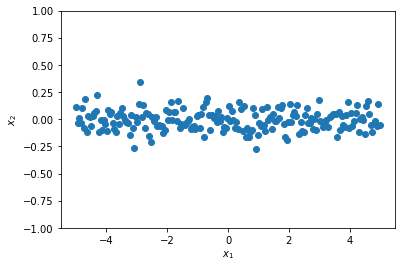

In [25]:
# 建立toy data
x1 = np.linspace(-5,5,200)
noise = np.random.normal(0,0.1,len(x1))
x2 =  noise

# 畫出toy data
plt.scatter(x1,x2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.ylim(-1,1)
plt.show()

練習：將以上資料做降維。

In [26]:
data = np.vstack((x1,x2)).T
data.shape

(200, 2)

In [50]:
pca = PCA(n_components=1)
pca.fit(data)

pca.explained_variance_[0]

8.459388858291302

In [46]:
reduce_data = pca.transform(data)
variance(reduce_data)

8.459388858291303

In [49]:
reduce_data = np.dot(data, pca.components_.T)
variance(reduce_data)

8.459388858291303

In [45]:
pca.components_

array([[-9.99999614e-01,  8.78338421e-04]])

In [47]:
pca.explained_variance_ratio_

array([0.99896309])